Objective: What genre of movies gets the highest IMDB ratings?
Data Source:  https://www.kaggle.com/datasets/fernandogarciah24/top-1000-imdb-dataset/data

In [433]:
#Import Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

imdb_top = pd.read_csv("imdb_top_1000.csv")
 

print(imdb_top)

                                           Poster_Link  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
..                                                 ...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
..                        ...           ...         ...      ...   
998                  Lifeboat          1944         NaN   97 min   
999              The 39 Steps          1935         NaN   86 min   

                        Genre  IMDB_Rating  \
0                       Drama         9.30   
1                Crime, Drama         9.20   
..                        ...          ...   
998                Drama, War         7.60   
999  Crime, 

In [434]:
#Capitalize Columns
imdb_top.columns = imdb_top.columns.str.upper()

imdb_top.head

<bound method NDFrame.head of                                            POSTER_LINK  \
0    https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1    https://m.media-amazon.com/images/M/MV5BM2MyNj...   
..                                                 ...   
998  https://m.media-amazon.com/images/M/MV5BZTBmMj...   
999  https://m.media-amazon.com/images/M/MV5BMTY5OD...   

                 SERIES_TITLE RELEASED_YEAR CERTIFICATE  RUNTIME  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
..                        ...           ...         ...      ...   
998                  Lifeboat          1944         NaN   97 min   
999              The 39 Steps          1935         NaN   86 min   

                        GENRE  IMDB_RATING  \
0                       Drama         9.30   
1                Crime, Drama         9.20   
..                        ...          ...   
998                Drama, Wa

In [435]:
imdb_top.columns = imdb_top.columns.str.strip().str.replace('_', ' ')



In [436]:
#Print dataframe just using variable name
imdb_top

,POSTER LINK,SERIES TITLE,RELEASED YEAR,CERTIFICATE,RUNTIME,GENRE,IMDB RATING,OVERVIEW,META SCORE,DIRECTOR,STAR1,STAR2,STAR3,STAR4,NO OF VOTES,GROSS
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.60,Several survivors of a torpedoed merchant ship...,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.60,A man in London tries to help a counter-espion...,93.00,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [437]:
#First 5 Rows
imdb_top.head()

,POSTER LINK,SERIES TITLE,RELEASED YEAR,CERTIFICATE,RUNTIME,GENRE,IMDB RATING,OVERVIEW,META SCORE,DIRECTOR,STAR1,STAR2,STAR3,STAR4,NO OF VOTES,GROSS
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.30,Two imprisoned men bond over a number of years...,80.00,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.20,An organized crime dynasty's aging patriarch t...,100.00,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.00,When the menace known as the Joker wreaks havo...,84.00,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.00,The early life and career of Vito Corleone in ...,90.00,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.00,A jury holdout attempts to prevent a miscarria...,96.00,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [438]:
#last 5 Rows
imdb_top.tail()

,POSTER LINK,SERIES TITLE,RELEASED YEAR,CERTIFICATE,RUNTIME,GENRE,IMDB RATING,OVERVIEW,META SCORE,DIRECTOR,STAR1,STAR2,STAR3,STAR4,NO OF VOTES,GROSS
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.60,A young New York socialite becomes interested ...,76.00,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.60,Sprawling epic covering the life of a Texas ca...,84.00,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.60,"In Hawaii in 1941, a private is cruelly punish...",85.00,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.60,Several survivors of a torpedoed merchant ship...,78.00,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.60,A man in London tries to help a counter-espion...,93.00,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [439]:
#Datafram Dimensions
imdb_top.shape

(1000, 16)

In [440]:
#Dataframe Structure: Column names, data types, and non-null value counts
imdb_top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   POSTER LINK    1000 non-null   object 
 1   SERIES TITLE   1000 non-null   object 
 2   RELEASED YEAR  1000 non-null   object 
 3   CERTIFICATE    899 non-null    object 
 4   RUNTIME        1000 non-null   object 
 5   GENRE          1000 non-null   object 
 6   IMDB RATING    1000 non-null   float64
 7   OVERVIEW       1000 non-null   object 
 8   META SCORE     843 non-null    float64
 9   DIRECTOR       1000 non-null   object 
 10  STAR1          1000 non-null   object 
 11  STAR2          1000 non-null   object 
 12  STAR3          1000 non-null   object 
 13  STAR4          1000 non-null   object 
 14  NO OF VOTES    1000 non-null   int64  
 15  GROSS          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [441]:
#Check for missing values in dataset
print(dataframe.isnull().any().any())

True


In [442]:
#Columns with missing values
dataframe.isnull().sum()

Poster_Link       0
Series_Title      0
               ... 
No_of_Votes       0
Gross           169
Length: 16, dtype: int64

In [443]:
#Rows with missing values
imdb_top.isnull().any(axis=0)

POSTER LINK     False
SERIES TITLE    False
                ...  
NO OF VOTES     False
GROSS            True
Length: 16, dtype: bool

In [444]:
imdb_top.columns

Index(['POSTER LINK', 'SERIES TITLE', 'RELEASED YEAR', 'CERTIFICATE',
       'RUNTIME', 'GENRE', 'IMDB RATING', 'OVERVIEW', 'META SCORE', 'DIRECTOR',
       'STAR1', 'STAR2', 'STAR3', 'STAR4', 'NO OF VOTES', 'GROSS'],
      dtype='object')

In [445]:
#Making columns into a list
list(imdb_top.columns)

['POSTER LINK',
 'SERIES TITLE',
 'RELEASED YEAR',
 'CERTIFICATE',
 'RUNTIME',
 'GENRE',
 'IMDB RATING',
 'OVERVIEW',
 'META SCORE',
 'DIRECTOR',
 'STAR1',
 'STAR2',
 'STAR3',
 'STAR4',
 'NO OF VOTES',
 'GROSS']

In [446]:
#Values in Genre category
imdb_top['GENRE'].value_counts()

GENRE
Drama                     85
Drama, Romance            37
                          ..
Drama, War, Western        1
Adventure, Comedy, War     1
Name: count, Length: 202, dtype: int64

Data Cleaning

In [447]:
#Dropping unnecessary Columns
cols_to_drop = ['POSTER LINK', 'CERTIFICATE', 'OVERVIEW', 'STAR1', 'STAR2', 'STAR3', 'STAR4']
imdb_top = imdb_top.drop(columns = cols_to_drop)


imdb_top.head()

,SERIES TITLE,RELEASED YEAR,RUNTIME,GENRE,IMDB RATING,META SCORE,DIRECTOR,NO OF VOTES,GROSS
0,The Shawshank Redemption,1994,142 min,Drama,9.30,80.00,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.20,100.00,Francis Ford Coppola,1620367,"134,966,411"
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.00,84.00,Christopher Nolan,2303232,"534,858,444"
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.00,90.00,Francis Ford Coppola,1129952,"57,300,000"
4,12 Angry Men,1957,96 min,"Crime, Drama",9.00,96.00,Sidney Lumet,689845,"4,360,000"


In [448]:
#Cleaning missing data
imdb_top_filled = imdb_top.fillna(0)
imdb_top['GENRE'] = imdb_top['GENRE'].fillna('Unknown')

imdb_top


,SERIES TITLE,RELEASED YEAR,RUNTIME,GENRE,IMDB RATING,META SCORE,DIRECTOR,NO OF VOTES,GROSS
0,The Shawshank Redemption,1994,142 min,Drama,9.30,80.00,Frank Darabont,2343110,"28,341,469"
1,The Godfather,1972,175 min,"Crime, Drama",9.20,100.00,Francis Ford Coppola,1620367,"134,966,411"
...,...,...,...,...,...,...,...,...,...
998,Lifeboat,1944,97 min,"Drama, War",7.60,78.00,Alfred Hitchcock,26471,NaN
999,The 39 Steps,1935,86 min,"Crime, Mystery, Thriller",7.60,93.00,Alfred Hitchcock,51853,NaN


In [449]:
#Cleaning numeric data
pd.set_option('display.float_format', '{:.2f}'.format)

imdb_top.describe()

,IMDB RATING,META SCORE,NO OF VOTES
count,1000.00,843.00,1000.00
mean,7.95,77.97,273692.91
...,...,...,...
75%,8.10,87.00,374161.25
max,9.30,100.00,2343110.00


<Axes: xlabel='META SCORE'>

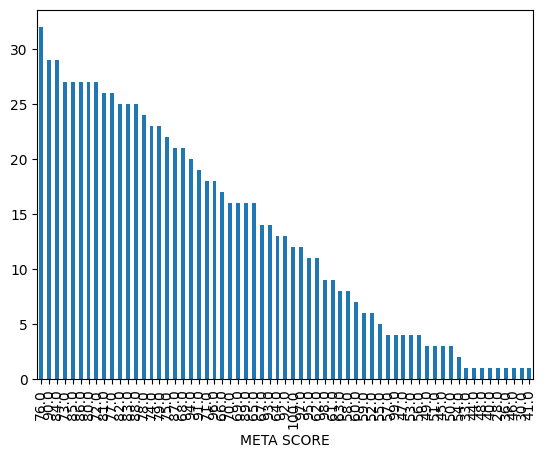

In [450]:
#Bar Graph for Meta Scores
imdb_top['META SCORE'].value_counts().plot(kind='bar', rot=90)

In [451]:
imdb_top.GENRE.describe()

count      1000
unique      202
top       Drama
freq         85
Name: GENRE, dtype: object

In [452]:
#Most frequent Genre
imdb_top.GENRE.mode()


0    Drama
Name: GENRE, dtype: object

In [453]:
imdb_top.GENRE.max()

'Western'

In [454]:

imdb_top.GENRE.min()

'Action, Adventure'

In [455]:
#Different combinations of Genres
imdb_top['GENRE'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [456]:
unique_genres = sorted(set(
    genre.strip()
    for genres in imdb_top['GENRE'].dropna()
    for genre in genres.split(',')
))
print(unique_genres)

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [457]:
imdb_top['GENRE'].str.split(',', expand=True)


,0,1,2
0,Drama,None,None
1,Crime,Drama,None
...,...,...,...
998,Drama,War,None
999,Crime,Mystery,Thriller


Added 3 Columns to separate Movie that fall into more than 1 Genre

In [458]:
imdb_top[["Genre 1", "Genre 2", "Genre 3"]] = imdb_top["GENRE"].str.split(",", expand=True)

imdb_top

,SERIES TITLE,RELEASED YEAR,RUNTIME,GENRE,IMDB RATING,META SCORE,DIRECTOR,NO OF VOTES,GROSS,Genre 1,Genre 2,Genre 3
0,The Shawshank Redemption,1994,142 min,Drama,9.30,80.00,Frank Darabont,2343110,"28,341,469",Drama,None,None
1,The Godfather,1972,175 min,"Crime, Drama",9.20,100.00,Francis Ford Coppola,1620367,"134,966,411",Crime,Drama,None
...,...,...,...,...,...,...,...,...,...,...,...,...
998,Lifeboat,1944,97 min,"Drama, War",7.60,78.00,Alfred Hitchcock,26471,NaN,Drama,War,None
999,The 39 Steps,1935,86 min,"Crime, Mystery, Thriller",7.60,93.00,Alfred Hitchcock,51853,NaN,Crime,Mystery,Thriller


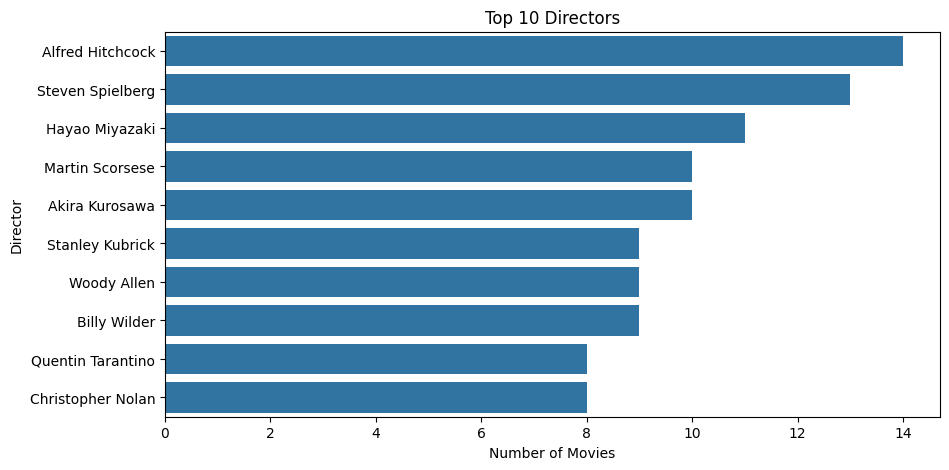

In [459]:
# Top 10 directors
top_directors = imdb_top['DIRECTOR'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

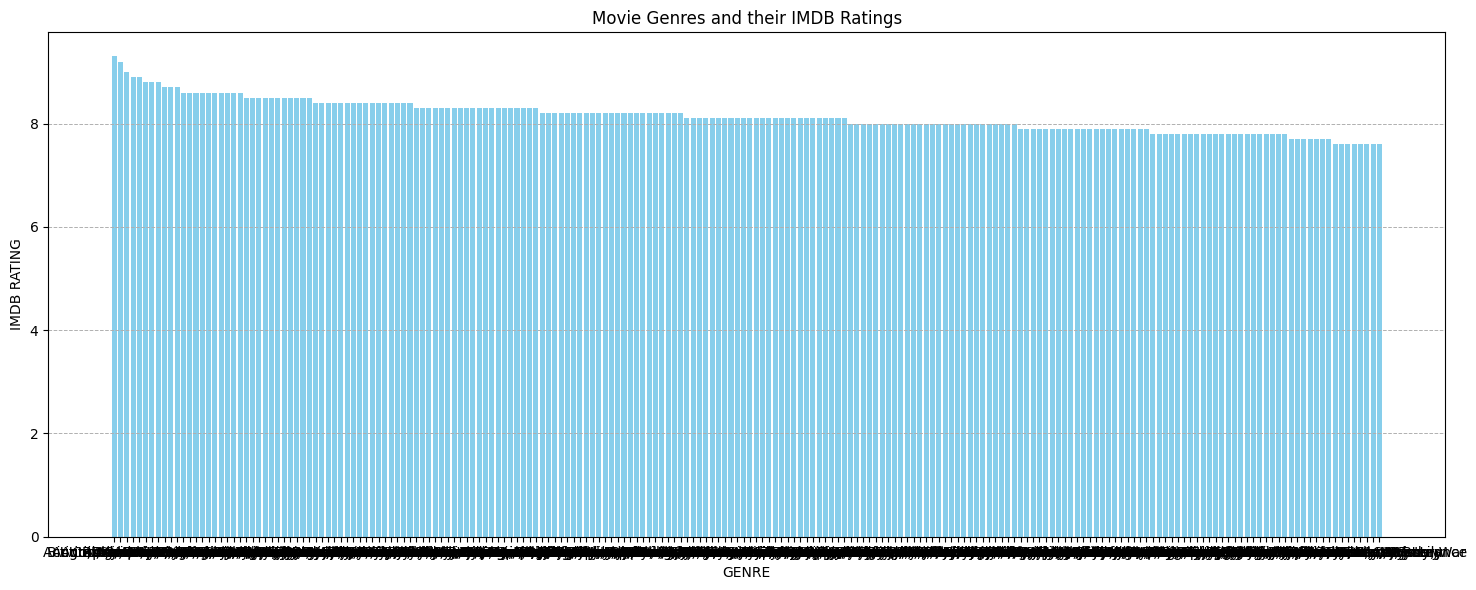

In [461]:
#Creating Bar graph for Genre vs IMDB Ratings
# Step 1: Extract Data
# Replace these with your actual DataFrame columns
categories = imdb_top_filled['GENRE']
backers = imdb_top_filled['IMDB RATING']

# Step 2: Create the Plot
plt.figure(figsize=(15, 6))  # Set figure size
plt.bar(categories, backers, color='skyblue')  # Create a bar plot


# Add title and axis labels
plt.title('Movie Genres and their IMDB Ratings')
plt.xlabel('GENRE')
plt.ylabel('IMDB RATING')

# Add gridlines for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

# Show the plot
plt.tight_layout()
# plt.savefig('quilting.jpg') # optional to save the plot
plt.show()

In [463]:
# Sorting of Genres with their IMDB Ratings
imdb_top.groupby('GENRE')['IMDB RATING'].mean().round(2).sort_values(ascending=False)

GENRE
Animation, Drama, War       8.50
Action, Sci-Fi              8.40
                            ... 
Animation, Drama, Romance   7.60
Drama, War, Western         7.60
Name: IMDB RATING, Length: 202, dtype: float64

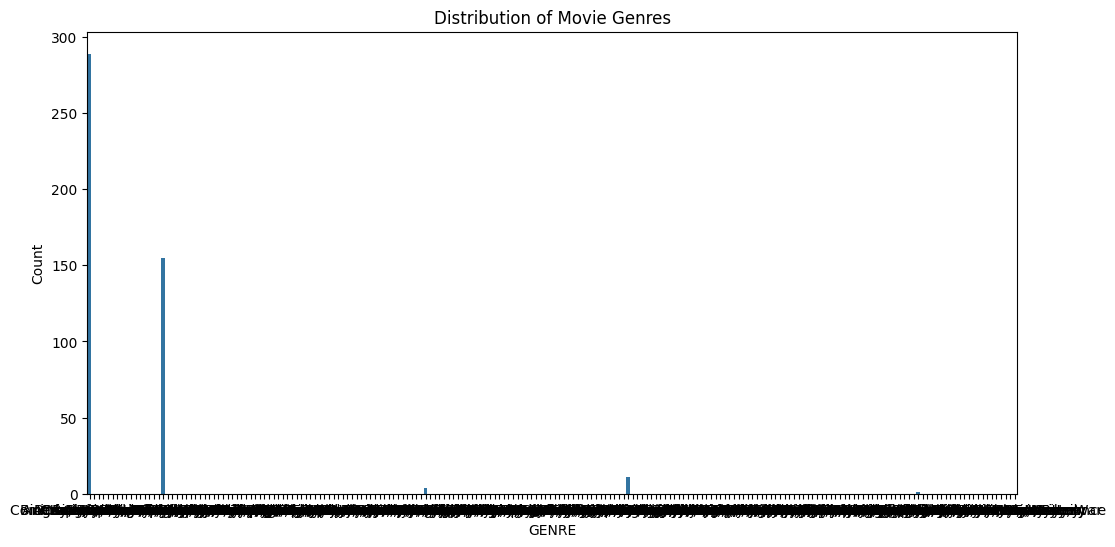

In [ ]:
# Plot the distribution of genres
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre 1', data=imdb_top, order=imdb_top['GENRE'].value_counts().index)
plt.title('Distribution of Movie Genre Group 1')
plt.xlabel('GENRE')
plt.ylabel('Count')
plt.show()

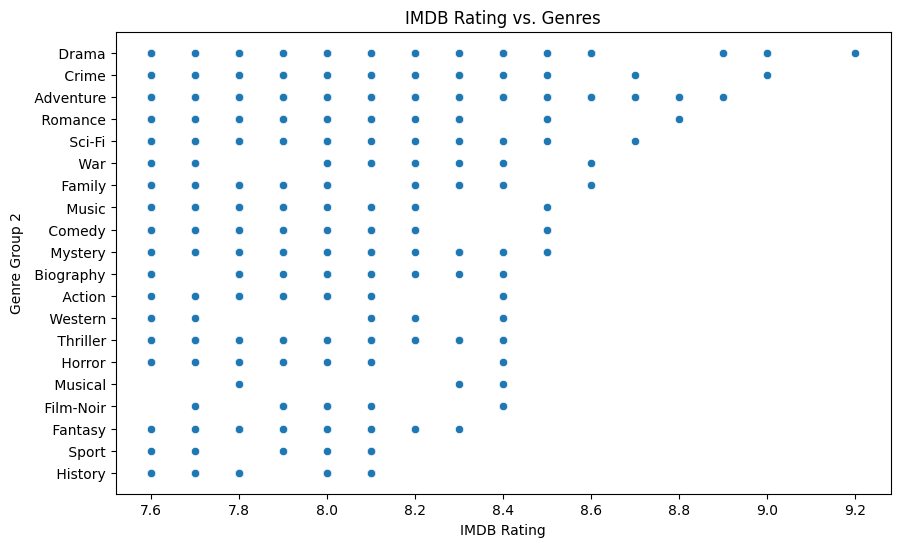

In [472]:
# Scatter plot of IMDB Rating vs. Genres
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB RATING', y='Genre 2', data=imdb_top)
plt.title('IMDB Rating vs. Genres')
plt.xlabel('IMDB Rating')
plt.ylabel('Genre Group 2')
plt.show()

In [475]:
# Top 10 Movies based on IMDB_Rating
df_top10_movie = imdb_top[['SERIES TITLE','GENRE', 'IMDB RATING', 'GROSS']].sort_values(by = 'IMDB RATING', ascending = False).head(10)
df_top10_movie.set_index((x for x in range(1, 11)), inplace = True)
df_top10_movie

,SERIES TITLE,GENRE,IMDB RATING,GROSS
1,The Shawshank Redemption,Drama,9.30,"28,341,469"
2,The Godfather,"Crime, Drama",9.20,"134,966,411"
...,...,...,...,...
9,Fight Club,Drama,8.80,"37,030,102"
10,Inception,"Action, Adventure, Sci-Fi",8.80,"292,576,195"


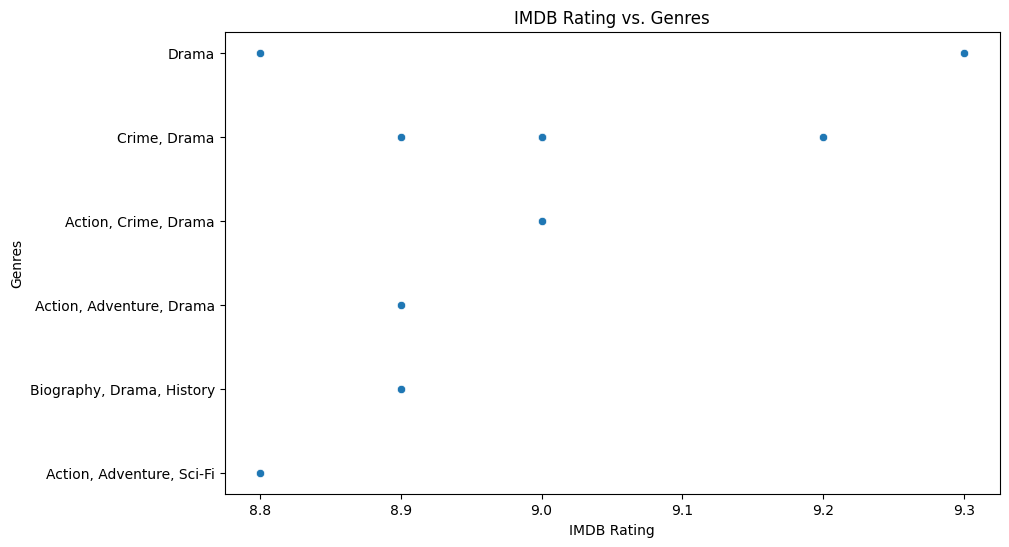

In [476]:
# Scatter plot of IMDB Rating vs. Genres among the top 10 movies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB RATING', y='GENRE', data=df_top10_movie)
plt.title('IMDB Rating vs. Genres')
plt.xlabel('IMDB Rating')
plt.ylabel('Genres')
plt.show()

Using the Top 10 IMDB Ratings, Drama seems to be the highest rated Genre using data from the IMDB Top 1000 Movies